In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
b1 = pd.read_csv('b9600.csv')
b1['baud'] = 9600
b2 = pd.read_csv('b38400.csv')
b2['baud'] = 38400
b3 = pd.read_csv('b230400.csv')
b3['baud'] = 230400

df = pd.concat([b1,b2,b3])

In [3]:
df.head()

,tprop,fer,infosize,time,baud
0,0,0.00,256,12.682075,9600
1,0,0.00,512,12.150566,9600
2,0,0.00,1024,NaN,9600
3,0,0.00,2048,39.454936,9600
4,0,0.01,256,12.682848,9600


/tmp/ipykernel_24066/1379151135.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  k = df[df['tprop'] == 0].drop('tprop',1)


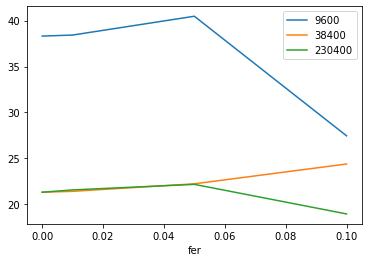

In [5]:
k = df[df['tprop'] == 0].drop('tprop',1)

k = df.groupby(['fer', 'baud'], as_index=False).mean()[['fer','baud','time']]
k = k.interpolate(method='cubic')

fig, ax = plt.subplots()
for key, grp in k.groupby('baud'):
    ax = grp.plot(ax=ax, kind='line', x='fer', y='time', label=key)
plt.legend(loc='best')
plt.show()

In [84]:
df = df[df['fer'] == 0].drop('fer',1)
df.head()

/tmp/ipykernel_9682/2198598728.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df[df['fer'] == 0].drop('fer',1)


,tprop,infosize,time,baud
0,0,256,12.682075,9600
1,0,512,12.150566,9600
2,0,1024,NaN,9600
3,0,2048,39.454936,9600
16,200000,256,32.084832,9600


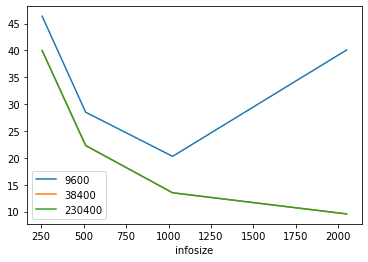

In [102]:
k = df.groupby(['infosize', 'baud'], as_index=False).mean()[['infosize','baud','time']]
k = k.interpolate(method='cubic')

fig, ax = plt.subplots()
for key, grp in k.groupby('baud'):
    ax = grp.plot(ax=ax, kind='line', x='infosize', y='time', label=key)
plt.legend(loc='best')
plt.show()

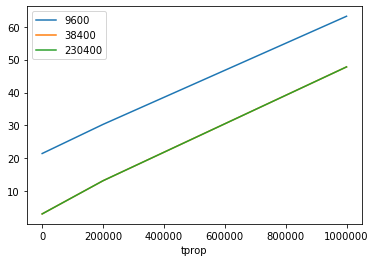

In [103]:
k = df.groupby(['tprop', 'baud'], as_index=False).mean()[['tprop','baud','time']]
k = k.interpolate(method='cubic')

fig, ax = plt.subplots()
for key, grp in k.groupby('baud'):
    ax = grp.plot(ax=ax, kind='line', x='tprop', y='time', label=key)
plt.legend(loc='best')
plt.show()